In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.datasets import fetch_california_housing

In [20]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [23]:
X = X.iloc[:, :-2] #removing the last two columns
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [24]:
X.describe() #for veiwing statistical descriptions

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [25]:
# function for ploting the Data

def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

In [26]:
rng = np.random.RandomState(0)

In [27]:
rng


RandomState(MT19937) at 0x2DD728DB540

In [42]:
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
print(len(X))
X

25


array([[0.06842935],
       [0.09245041],
       [0.19129354],
       [0.20484195],
       [0.27317541],
       [0.27613336],
       [0.29671343],
       [0.33188489],
       [0.34141948],
       [0.37229872],
       [0.39955477],
       [0.40931471],
       [0.41011171],
       [0.49295444],
       [0.51298635],
       [0.51662931],
       [0.53224573],
       [0.54435654],
       [0.57561797],
       [0.59672562],
       [0.60058541],
       [0.60708297],
       [0.61569556],
       [0.68227264],
       [0.78485017]])

(array([1.11666213, 1.39582766, 1.39582766, 2.51248979, 0.55833106]),
 array([0.06842935, 0.21171351, 0.35499768, 0.49828184, 0.64156601,
        0.78485017]),
 <BarContainer object of 5 artists>)

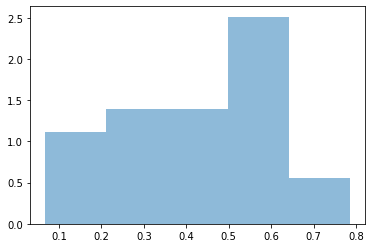

In [43]:
plt.hist(X, 5, density=1, alpha=0.5)

In [44]:
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=0)
X_fit = qt.fit_transform(X)
X_fit

array([[-5.19933758],
       [-2.04890665],
       [-1.26184535],
       [-1.18919678],
       [-0.80980488],
       [-0.79604871],
       [-0.67980442],
       [-0.48116098],
       [-0.4307273 ],
       [-0.28868621],
       [-0.16807944],
       [-0.12993828],
       [-0.12754625],
       [ 0.11966698],
       [ 0.25607298],
       [ 0.28835836],
       [ 0.4307273 ],
       [ 0.49611115],
       [ 0.67625133],
       [ 0.90156724],
       [ 0.98431795],
       [ 1.14139638],
       [ 1.24013135],
       [ 1.51278458],
       [ 5.19933758]])

(array([0.01923322, 0.05769966, 0.32696473, 0.05769966, 0.01923322]),
 array([-5.19933758, -3.11960255, -1.03986752,  1.03986752,  3.11960255,
         5.19933758]),
 <BarContainer object of 5 artists>)

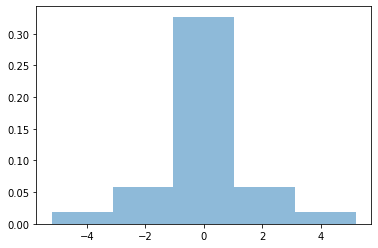

In [46]:
plt.hist(X_fit, 5, density=1, alpha=0.5)